In [37]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt

from utils.cuda_cluster import *
from utils.dataset import read_data

import core.config as conf

In [3]:
client

Client Scheduler: tcp://127.0.0.1:37381 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 1 Cores: 1 Memory: 33.47 GB


In [9]:
# data_path = conf.raw_data_path + '*' # for all dataset
data_path = conf.raw_data_path + 'part-00175'
df = read_data(data_path)

number of rows: 3033347


In [11]:
columns = [
    "reply_timestamp",
    "retweet_timestamp",
    "retweet_with_comment_timestamp",
    "like_timestamp"
]
df = df[columns]

In [12]:
df.head()

,reply_timestamp,retweet_timestamp,retweet_with_comment_timestamp,like_timestamp
id,,,,
1,0,0,0,1613048460
2,0,0,0,0
3,1614019431,0,0,0
4,0,0,0,1612780118
5,0,0,0,0


In [33]:
df['is_reply'] = df['reply_timestamp'].compute().applymap(lambda x: 1 if x > 0 else 0).astype(np.int32)
df['is_retweet'] = df['retweet_timestamp'].compute().applymap(lambda x: 1 if x > 0 else 0).astype(np.int32)
df['is_comment'] = df['retweet_with_comment_timestamp'].compute().applymap(lambda x: 1 if x > 0 else 0).astype(np.int32)
df['is_like'] = df['like_timestamp'].compute().applymap(lambda x: 1 if x > 0 else 0).astype(np.int32)

df['is_positive'] = df['is_reply'] | df['is_retweet'] | df['is_comment'] | df['is_like']
df['is_negative'] =  df['is_positive'].compute().applymap(lambda x: 1 if x == 0 else 0).astype(np.int32)

In [30]:
n_engagements = len(df)
print('The total amount of engagements : ', n_engagements)

The total amount of engagements :  3033347


Positive engagements :  1513814
Negative engagements :  1519533
Reply engagements :  90061
Rtweet engagements :  265563
Comment engagements :  21347
Like engagements :  1207792


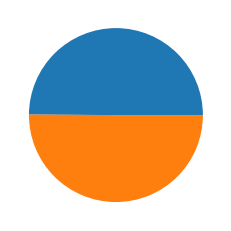

In [39]:
n_positive_engagements = df['is_positive'].compute().sum()
n_negative_engagements = df['is_negative'].compute().sum()
n_reply_engagements = df['is_reply'].compute().sum()
n_retweet_engagements = df['is_retweet'].compute().sum()
n_comment_engagements = df['is_comment'].compute().sum()
n_like_engagements = df['is_like'].compute().sum()

print('Positive engagements : ', n_positive_engagements)
print('Negative engagements : ', n_negative_engagements)
print('Reply engagements : ', n_reply_engagements)
print('Rtweet engagements : ', n_retweet_engagements)
print('Comment engagements : ', n_comment_engagements)
print('Like engagements : ', n_like_engagements)

plt.pie([n_positive_engagements, n_negative_engagements])
plt.show()